<a href="https://colab.research.google.com/github/BMac23/Mat421/blob/main/Section_20_1%2C_20_2%2C_20_3%2C_20_4_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Differentiation

In mathematics, a numerical grid is used to define an evenly spaced apart set of points within some domain and range. The distance between these points is often referred to as the step size. These step sizes can change with the exact specifics of each function.

A limit is a mathematical function that essentially takes a numerical grid leading up to a point and makes each step size shorter and shorter to approximate as close to that point as possible.

In real life, functions may be continuous but in python, these functions must be discretized due to the nature of a computer's memory and code. When it comes to differentiation, we try to take a limit extremely close to each point of these discretized functions to approximate a derivative at this point.

## Finite Difference Approximating Derivatives

In mathematical computing, it's hard to take exact symbolic derivatives of a function, especially if we don't know the exact function itself. That's why we take extremely close differences to find the slope at a point $x=a$

There are 3 main methods of approximating the derivative of a function $f(x)$ through a difference function.

Forward difference:
\begin{equation}
f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1} - x_j}
\end{equation}

Central difference:
\begin{equation}
f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{x_{j+1} - x_{j-1}}
\end{equation}

Backward difference:
\begin{equation}
f'(x_j) = \frac{f(x_{j}) - f(x_{j-1})}{x_{j} - x_{j-1}}
\end{equation}

These equations can be approximated easier with Taylor Series polynomials. For example the Central difference formula can be improved on by combining the equations for the Taylor series around $a=x_j$ at both $x_{j+1}$ and $x_{j-1}$.

The equations are: $f(x_{j+1})=f(x_j)+f′(x_j)h+\frac{1}{2}f′′(x_j)h^2+\frac{1}{6}f′′′(x_j)h^3+⋯$ and $f(x_{j-1})=f(x_j)-f′(x_j)h+\frac{1}{2}f′′(x_j)h^2-\frac{1}{6}f′′′(x_j)h^3+⋯$

Subtracting these formulas and solving for $f'(x_j)$ gives the formula:
\begin{equation}
f'(x_j) ~= \frac{f(x_{j+1}) - f(x_{j-1})}{2h}
\end{equation}

Python has a function that automatically computes finite differences so we will approximate a function as close as we can for a function of $sin(x)$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

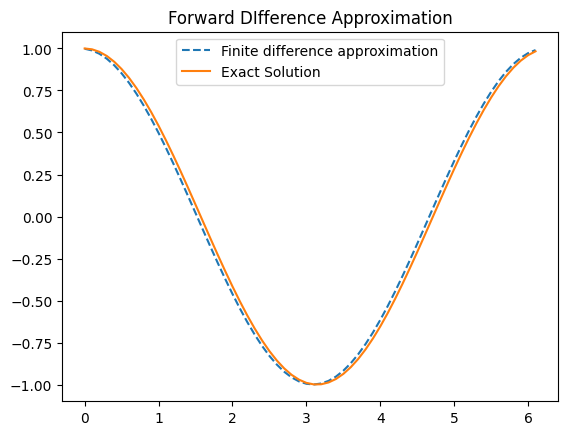

In [3]:
h = 0.1
x = np.arange(0, 2*np.pi, h)
y = np.sin(x)

forward_diff = np.diff(y)/h
x_diff = x[:-1:]
exact_solution = np.cos(x_diff)

plt.figure()
plt.plot(x_diff, forward_diff, '--', \
         label='Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact Solution')

plt.title('Forward DIfference Approximation')
plt.legend()
plt.show()

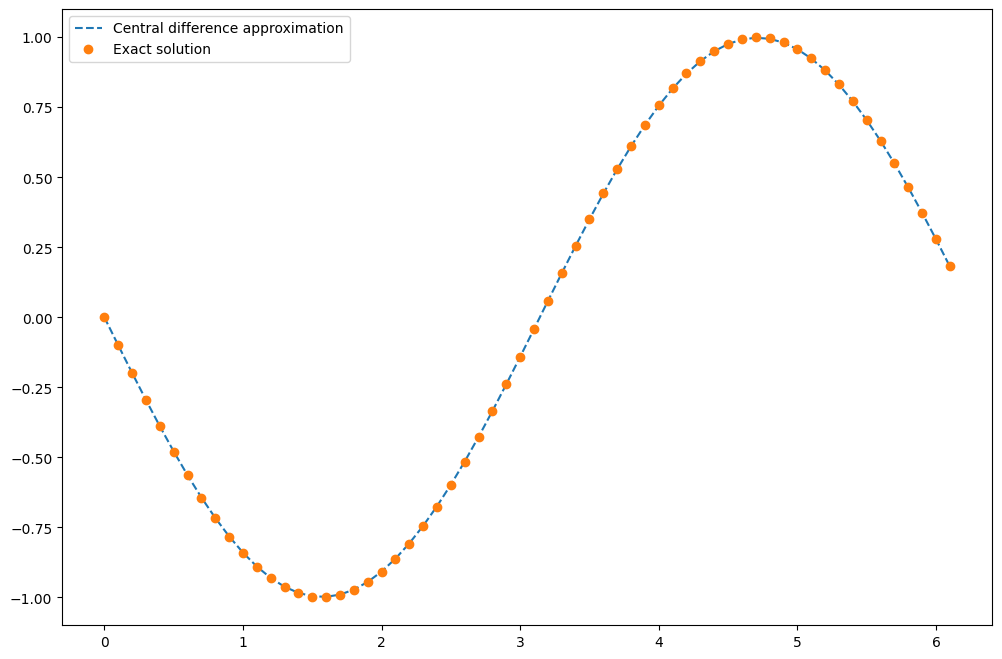

In [8]:
# My own way of central difference:

def central_diff(func, x, h=0.1):
  return (func(x+h) - func(x-h))/ (2 * h)

x = np.arange(0, 2*np.pi, h)
y = np.cos(x)

central_diff = np.array([central_diff(np.cos, xi, h) for xi in x[:-1]])

x_diff = x[:-1]

exact_solution = -np.sin(x_diff)

plt.figure(figsize=(12, 8))
plt.plot(x_diff, central_diff, '--', label='Central difference approximation')
plt.plot(x_diff, exact_solution, 'o', label='Exact solution')
plt.legend()
plt.show()


I had to plot them in a different format because the graphs were too similar

## Aproximating Higher Order Derivatives

It's possible to use Taylor series to approximate higher order derivatives. Using the equations for $f(x_{j+1})$ and $f(x_{j-1})$ from before, we can get a higher order term to be equivalent to:
\begin{equation}
f''(x_j) = \frac{f(x_{j+1}) - 2f(x_j) + f(x_{j-1})}{h^2}
\end{equation}

My own attempt at code for this would look like:

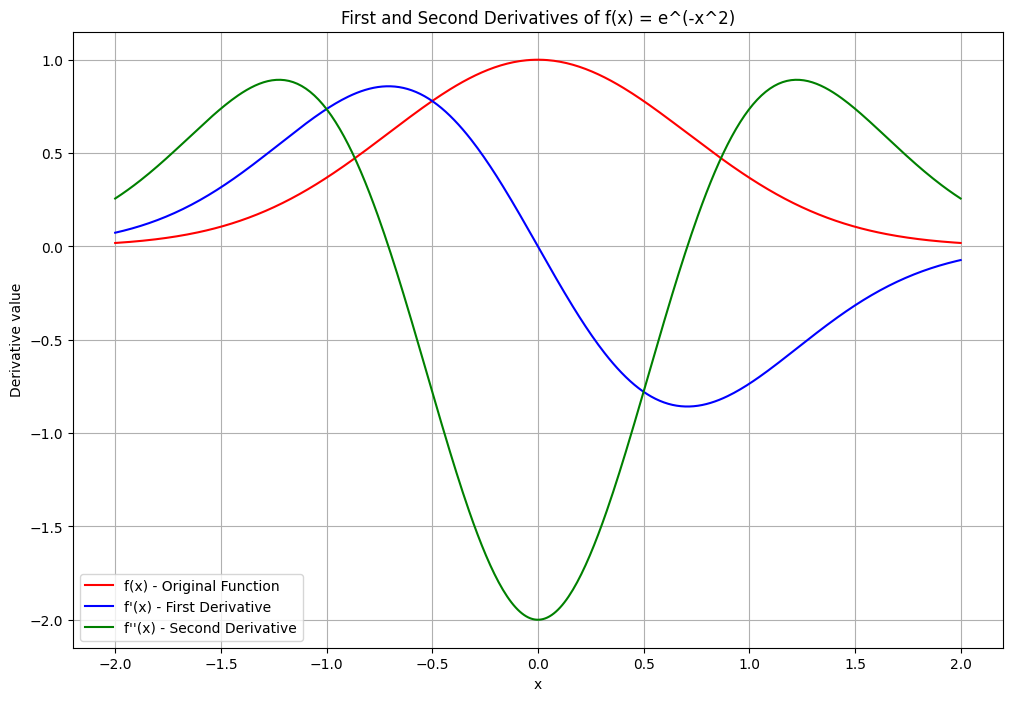

In [9]:
def func(x):
    return np.exp(-x**2)

def first_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=1e-5):
    return (f(x + h) - 2*f(x) + f(x - h)) / (h**2)

x_values = np.linspace(-2, 2, 400)

y_values = [func(x) for x in x_values]
first_derivatives = [first_derivative(func, x) for x in x_values]
second_derivatives = [second_derivative(func, x) for x in x_values]

plt.figure(figsize=(12, 8))
plt.plot(x_values, y_values, label="f(x) - Original Function", color='red')
plt.plot(x_values, first_derivatives, label="f'(x) - First Derivative", color='blue')
plt.plot(x_values, second_derivatives, label="f''(x) - Second Derivative", color='green')
plt.title('First and Second Derivatives of f(x) = e^(-x^2)')
plt.xlabel('x')
plt.ylabel('Derivative value')
plt.legend()
plt.grid(True)
plt.show()
